In [1]:
#library- library yang digunakan pada proses text mining "Analisis Sentimen Ulasan Terkait Jakarta International Stadium"
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import re
import Sastrawi

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
#Load Data CSV
df = pd.read_csv('DataUlasan.csv')
df.head(10)

,Nama,Sentimen,Ulasan
0,"""TIGER_SEMBRANI""",Negatif,udah ga penasaran udah pernah masuk😂
1,. Akbar,Negatif,AKSESNYA SUSAH! SAMPAH
2,___cumulonimbus99,Negatif,wadidaw panjang banget ges 4 jam
3,__Rihaann,Positif,keren kieu anyengg stadion jis 🙌
4,_damarsty,Negatif,"nungguin jis rampung lama banget, kasian stadi..."
5,_daskin,Negatif,artinya apa bang messi?
6,_Jepri,Negatif,coba kalau gak ada trek larinya keren itu
7,_MazHb,Positif,Persija auto support pak Anis 10 periode😂
8,_xcalfancyy,Negatif,Anjay 65k penonton gk bener musim depan klo Pe...
9,~^eiger^~,Negatif,wkwkwk tak seindah di Qatar itu yang di nama k...


Sentimen Positif : 1832 data
Sentimen Negatif : 1139 data


<AxesSubplot:xlabel='Sentimen', ylabel='count'>

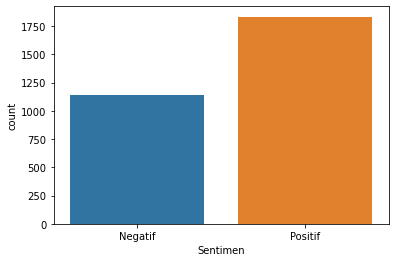

In [3]:
#melihat jumlah data positif dan negatif serta visualisasi jumlah sentimen dengan seaborn
print (f"Sentimen Positif : {len(df[df['Sentimen']== 'Positif'])} data")
print (f"Sentimen Negatif : {len(df[df['Sentimen']== 'Negatif'])} data")
sns.countplot(x='Sentimen',data=df)

# Preprocessing Data

In [4]:
#Preprocessing data_CaseFolding
def casefolding(text) : 
    text = text.lower() #Mengubah Semua Huruf Menjadi LowerCase
    text = text.strip(" ") #Menghilangkan Space Kosong
    text = re.sub(r'[?|$|.|!2_:")(-+,]', '', text) #Menghilangkan Tanda Baca
    text = re.sub('[^a-zA-Z]', ' ', text) #Emot,Angka
    return text
df['Ulasan'] = df['Ulasan'].apply(casefolding)
df.head(10)

,Nama,Sentimen,Ulasan
0,"""TIGER_SEMBRANI""",Negatif,udah ga penasaran udah pernah masuk
1,. Akbar,Negatif,aksesnya susah sampah
2,___cumulonimbus99,Negatif,wadidaw panjang banget ges jam
3,__Rihaann,Positif,keren kieu anyengg stadion jis
4,_damarsty,Negatif,nungguin jis rampung lama banget kasian stadio...
5,_daskin,Negatif,artinya apa bang messi
6,_Jepri,Negatif,coba kalau gak ada trek larinya keren itu
7,_MazHb,Positif,persija auto support pak anis periode
8,_xcalfancyy,Negatif,anjay k penonton gk bener musim depan klo pe...
9,~^eiger^~,Negatif,wkwkwk tak seindah di qatar itu yang di nama k...


In [5]:
#Preprocessing data_Stopword
stop_words = set(stopwords.words("indonesian"))
my_stopword = ['wadidaw','ges','kieu','gk','ygy','wkwkwk','k','anyengg','anjay'] #kamus kata yang ditambahkan
def stopword(text):
    text =[i for i in text.split() if i not in stopwords.words('indonesian')+my_stopword]
    return ' '.join(text)
df['Stopword'] = df['Ulasan'].apply(stopword)
df.head(10)

,Nama,Sentimen,Ulasan,Stopword
0,"""TIGER_SEMBRANI""",Negatif,udah ga penasaran udah pernah masuk,udah ga penasaran udah masuk
1,. Akbar,Negatif,aksesnya susah sampah,aksesnya susah sampah
2,___cumulonimbus99,Negatif,wadidaw panjang banget ges jam,banget jam
3,__Rihaann,Positif,keren kieu anyengg stadion jis,keren stadion jis
4,_damarsty,Negatif,nungguin jis rampung lama banget kasian stadio...,nungguin jis rampung banget kasian stadion bol...
5,_daskin,Negatif,artinya apa bang messi,bang messi
6,_Jepri,Negatif,coba kalau gak ada trek larinya keren itu,coba gak trek larinya keren
7,_MazHb,Positif,persija auto support pak anis periode,persija auto support anis periode
8,_xcalfancyy,Negatif,anjay k penonton gk bener musim depan klo pe...,penonton bener musim klo persija pake jis
9,~^eiger^~,Negatif,wkwkwk tak seindah di qatar itu yang di nama k...,seindah qatar nama stadion bagus


In [6]:
#menambahkan kamus untuk tokenize mengubah kata - kata yang tidak dikenali menjadi kata yang baku
slank_word_dict = {
    "yg" : "yang", 
    "tidk" : "tidak",
    "alesan" : "alasan", 
    "mirip" : "seperti", 
    "udh" : "udah",
    "mantul" : "mantap", 
    "bnyk" : "banyak", 
    "dn" : "dan",
    "enggak" : "tidak",
    "gak" : "tidak", 
    "indo" : "indonesia", 
    "tp" : "tapi", 
    "tpi" : "tapi",
    "ga" : "tidak",
    "bener" : "benar",
    "gak" : "tidak",
    "klo" : "kalo",
}
def slank_normalize(text):
    return [slank_word_dict[text] if text in slank_word_dict else text for text in text]

In [7]:
#Preprocessing data_Tokenize
def tokenizing(text):
    tokenize = text.lower()
    tokenize = text.split()
    return tokenize
df['Tokenize']=df['Stopword'].apply(lambda x :tokenizing(x)).apply(slank_normalize)
df.head(10)

,Nama,Sentimen,Ulasan,Stopword,Tokenize
0,"""TIGER_SEMBRANI""",Negatif,udah ga penasaran udah pernah masuk,udah ga penasaran udah masuk,"[udah, tidak, penasaran, udah, masuk]"
1,. Akbar,Negatif,aksesnya susah sampah,aksesnya susah sampah,"[aksesnya, susah, sampah]"
2,___cumulonimbus99,Negatif,wadidaw panjang banget ges jam,banget jam,"[banget, jam]"
3,__Rihaann,Positif,keren kieu anyengg stadion jis,keren stadion jis,"[keren, stadion, jis]"
4,_damarsty,Negatif,nungguin jis rampung lama banget kasian stadio...,nungguin jis rampung banget kasian stadion bol...,"[nungguin, jis, rampung, banget, kasian, stadi..."
5,_daskin,Negatif,artinya apa bang messi,bang messi,"[bang, messi]"
6,_Jepri,Negatif,coba kalau gak ada trek larinya keren itu,coba gak trek larinya keren,"[coba, tidak, trek, larinya, keren]"
7,_MazHb,Positif,persija auto support pak anis periode,persija auto support anis periode,"[persija, auto, support, anis, periode]"
8,_xcalfancyy,Negatif,anjay k penonton gk bener musim depan klo pe...,penonton bener musim klo persija pake jis,"[penonton, benar, musim, kalo, persija, pake, ..."
9,~^eiger^~,Negatif,wkwkwk tak seindah di qatar itu yang di nama k...,seindah qatar nama stadion bagus,"[seindah, qatar, nama, stadion, bagus]"


In [8]:
# Preprocessing data_Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(text):
    text = str(text).lower()
    text = stemmer.stem(text) 
    return text
df['Stemming']=df['Stopword'].apply(lambda x : stemming(x))
df.head(10)

,Nama,Sentimen,Ulasan,Stopword,Tokenize,Stemming
0,"""TIGER_SEMBRANI""",Negatif,udah ga penasaran udah pernah masuk,udah ga penasaran udah masuk,"[udah, tidak, penasaran, udah, masuk]",udah ga penasaran udah masuk
1,. Akbar,Negatif,aksesnya susah sampah,aksesnya susah sampah,"[aksesnya, susah, sampah]",akses susah sampah
2,___cumulonimbus99,Negatif,wadidaw panjang banget ges jam,banget jam,"[banget, jam]",banget jam
3,__Rihaann,Positif,keren kieu anyengg stadion jis,keren stadion jis,"[keren, stadion, jis]",keren stadion jis
4,_damarsty,Negatif,nungguin jis rampung lama banget kasian stadio...,nungguin jis rampung banget kasian stadion bol...,"[nungguin, jis, rampung, banget, kasian, stadi...",nungguin jis rampung banget kasi stadion bola ...
5,_daskin,Negatif,artinya apa bang messi,bang messi,"[bang, messi]",bang messi
6,_Jepri,Negatif,coba kalau gak ada trek larinya keren itu,coba gak trek larinya keren,"[coba, tidak, trek, larinya, keren]",coba gak trek lari keren
7,_MazHb,Positif,persija auto support pak anis periode,persija auto support anis periode,"[persija, auto, support, anis, periode]",persija auto support anis periode
8,_xcalfancyy,Negatif,anjay k penonton gk bener musim depan klo pe...,penonton bener musim klo persija pake jis,"[penonton, benar, musim, kalo, persija, pake, ...",tonton bener musim klo persija pake jis
9,~^eiger^~,Negatif,wkwkwk tak seindah di qatar itu yang di nama k...,seindah qatar nama stadion bagus,"[seindah, qatar, nama, stadion, bagus]",indah qatar nama stadion bagus


In [9]:
X_join = df["Stemming"]
#contoh untuk mengetahui jumlah term dari 1 dokumen
komen_tf = X_join[3],
print(komen_tf)

('keren stadion jis',)


In [10]:
cv = CountVectorizer()
term_fit = cv.fit(X_join)

term_frequency = term_fit.transform(komen_tf) #hanya menampilkan hasil dokumen 1
#kolom 1 = dokumen ke-
#kolom 2 = term ke-
#kolom 3 = jumlah term dalam 1 dokumen
print ("Jumlah Kemunculan Kata")
print (term_frequency)

Jumlah Kemunculan Kata
  (0, 1475)	1
  (0, 1687)	1
  (0, 3358)	1


In [11]:
max_features = 1000

vectorizer = TfidfVectorizer(max_features=max_features, binary=True)
tfidf_mat = vectorizer.fit_transform(df["Stemming"]).toarray()

terms = vectorizer.get_feature_names_out()

# sum tfidf frequency dari setiap dokumen
sums = tfidf_mat.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col]))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
844,stadion,170.443736
438,keren,111.576872
376,jis,89.238475
74,bagus,88.441061
637,nya,81.755302
...,...,...
170,byk,0.943832
655,overall,0.936312
528,lrt,0.930904
218,disabilitas,0.927654


In [12]:
from sklearn.preprocessing import normalize
max_features = 1000

def generate_tfidf_mat(min_gram, max_gram):
    cvect = CountVectorizer(max_features=max_features)
    counts = cvect.fit_transform(df["Stemming"])
    tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
    tfs = tfidf.fit_transform(df["Stemming"])
    
    normalized_counts = normalize(counts, norm='l1', axis=1)

    tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()
    
    TF = normalized_counts.toarray()
    IDF = tfidf.idf_
    TF_IDF = tfidf_mat
    return TF, IDF, TF_IDF, tfidf.get_feature_names_out()

# ngram_range (1, 1) to use unigram only
tf_mat_unigram, idf_mat_unigram, tfidf_mat_unigram, terms_unigram = generate_tfidf_mat(1,1)
# ---------- check sparse data -------------------
idx_sample = 3

print("Show TFIDF sample ke-" + str(idx_sample), "\n")
print(df["Stemming"][idx_sample], "\n")

print("\t", "\tTerm", "\t", "TF", "\t", "IDF", "\t", "TF-IDF\n")
for i, item in enumerate(zip(tf_mat_unigram[idx_sample], idf_mat_unigram, tfidf_mat_unigram[idx_sample], terms_unigram)):
    if(item[0] != 0.0):
        print ('%20s' % item[3], "\t", 
               "%.3f" % item[0], "\t", 
               "%.3f" % item[1], "\t", 
               "%.3f" % item[2])

Show TFIDF sample ke-3 

keren stadion jis 

	 	Term 	 TF 	 IDF 	 TF-IDF

                 jis 	 0.333 	 3.174 	 1.058
               keren 	 0.333 	 3.455 	 1.152
             stadion 	 0.333 	 2.377 	 0.792


# Pembobotan Kata TFIDF

In [13]:
X = df['Stemming']
Y = df['Sentimen']
vectorizer = TfidfVectorizer (max_features=5000)
counts = vectorizer.fit_transform(X)

print ("Pembobotan Term Frequency-Inverse Document Frequency (TF-IDF) \n")
print(counts)

Pembobotan Term Frequency-Inverse Document Frequency (TF-IDF) 

  (0, 2161)	0.3091731434815207
  (0, 2705)	0.529341221212544
  (0, 1042)	0.31836296739851183
  (0, 3739)	0.7230870347780975
  (1, 3066)	0.6582087222089518
  (1, 3459)	0.585663030062672
  (1, 80)	0.47303286696155583
  (2, 1431)	0.8283418625830442
  (2, 312)	0.5602229544497915
  (3, 1475)	0.6034390860647123
  (3, 3358)	0.45207350320965833
  (3, 1687)	0.6568796062484601
  (4, 3003)	0.23818657908680532
  (4, 2615)	0.2810238663699277
  (4, 879)	0.29545029299427
  (4, 1547)	0.24612601457793726
  (4, 2298)	0.14889517301704572
  (4, 1566)	0.16204314069584858
  (4, 3521)	0.2810238663699277
  (4, 1021)	0.2810238663699277
  (4, 1035)	0.2707881537861036
  (4, 822)	0.20418953353404642
  (4, 2386)	0.29545029299427
  (4, 540)	0.15352245628857766
  (4, 1598)	0.2628487182949717
  :	:
  (2968, 2325)	0.17680620008568806
  (2968, 3834)	0.32961592605586626
  (2968, 282)	0.24019189670881103
  (2968, 3582)	0.20118347670274153
  (2968, 321)	0.137

In [14]:
import imblearn
from imblearn.over_sampling import SMOTE
x = counts
y = df['Sentimen']
sm = SMOTE(random_state=42)
X_sampling, Y_sampling = sm.fit_resample(x, y)
print(x.shape)
print(y.shape)
print(X_sampling.shape)
print(Y_sampling.shape)

(2971, 3941)
(2971,)
(3664, 3941)
(3664,)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sampling,Y_sampling, test_size=0.2, random_state=42)
print(X_test)

  (0, 3235)	0.5525297442617811
  (0, 188)	0.5439684466759586
  (0, 1309)	0.536223810963344
  (0, 2516)	0.2720503269622537
  (0, 3358)	0.19303329993199184
  (1, 2157)	0.5748972980094692
  (1, 2863)	0.45305398862169904
  (1, 3558)	0.37308956719923725
  (1, 334)	0.31681158569473006
  (1, 2930)	0.4739934326043532
  (2, 1577)	0.5865137875864573
  (2, 3523)	0.5244309371167836
  (2, 1342)	0.42061994352940946
  (2, 2190)	0.3788879727895345
  (2, 3358)	0.2459604365473313
  (3, 1702)	0.6636912072669544
  (3, 1091)	0.48223234479343624
  (3, 3376)	0.3537191064072774
  (3, 2516)	0.2813297691388259
  (3, 312)	0.35028888333815167
  (4, 2548)	0.5630048475000505
  (4, 606)	0.5630048475000505
  (4, 3013)	0.5160091116583263
  (4, 3920)	0.23143665787248013
  (4, 1475)	0.21499477542789594
  :	:
  (727, 492)	0.40816921774151704
  (727, 334)	0.2824954726795768
  (727, 2516)	0.2172952986764697
  (728, 1522)	0.4834584565958451
  (728, 272)	0.4834584565958451
  (728, 2809)	0.3588615613573397
  (728, 2657)	0.248

# Pemodelan MNB & RDF

              precision    recall  f1-score   support

     Negatif       0.83      0.84      0.84       376
     Positif       0.83      0.82      0.82       357

    accuracy                           0.83       733
   macro avg       0.83      0.83      0.83       733
weighted avg       0.83      0.83      0.83       733



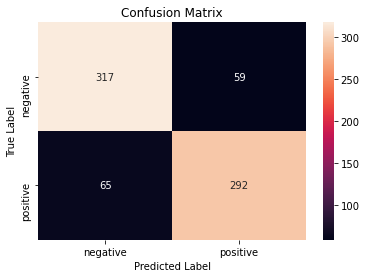

In [16]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
naive_bayes_pred = classifier.predict(X_test)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

     Negatif       0.77      0.88      0.82       376
     Positif       0.85      0.73      0.78       357

    accuracy                           0.80       733
   macro avg       0.81      0.80      0.80       733
weighted avg       0.81      0.80      0.80       733



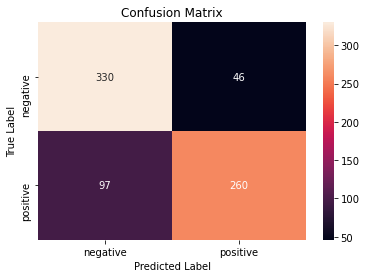

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
classR = RandomForestClassifier(n_estimators=100)
classR.fit(X_train, y_train)
random_forest_pred = classR.predict(X_test)
# Classification Report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Simpan Pemodelan 

In [18]:
#Minyimpan Pemodelan MNB
import pickle
pickle.dump(classifier, open('MNB.pkl', 'wb'))
pickle.dump(classR,open('RDF.pkl','wb'))
#Menyimpan TFIDF
pickle.dump(vectorizer, open('TFIDF.pkl', 'wb'))

# Predict Data Test Baru

In [19]:
df_baru = pd.read_csv('DatasetBaru.csv')
df_baru

,Nama,Ulasan
0,Valen Radja Naitili,Sebagai anak bangsa saatnya kita saling menduk...
1,Lukman Projayan,jis adalah produk anak bangsa alias lokal prid...
2,man,STADION TERBAIK BELUM ADA DI NEGARA2 ASIA TE...
3,Agung Wahyu,JIS adalah Stadion yg menelan biaya lebih...
4,Wan Adzro,Salam dari Kuala Lumpur.. Stadium dah bagus. H...
...,...,...
156,Sumarno Agus,Konten yang sangat Bagus
157,afri yadi channel,Stadion seperti ini gak masuk untuk piala duni...
158,Imam Sutrisno,Kemegahan JIS seakan hampa karna tidak masuk s...
159,Fatma Heru,"""KEMEGAHAN JIS YANG TAK ADA GUNANYA"",percuma m..."


In [20]:
#load data pemodelan
pickled_model = pickle.load(open('MNB.pkl', 'rb'))
pickvec_model = pickle.load(open('TFIDF.pkl', 'rb'))

In [21]:
def casefolding(text) : 
    text = text.lower() #Mengubah Semua Huruf Menjadi LowerCase
    text = text.strip(" ") #Menghilangkan Space Kosong
    text = re.sub(r'[?|$|.|!2_:")(-+,]', '', text) #Menghilangkan Tanda Baca
    text = re.sub('[^a-zA-Z]', ' ', text) #Emot,Angka
    return text
df_baru['TextPrep'] = df_baru['Ulasan'].apply(casefolding)
df_baru.head(10)

,Nama,Ulasan,TextPrep
0,Valen Radja Naitili,Sebagai anak bangsa saatnya kita saling menduk...,sebagai anak bangsa saatnya kita saling menduk...
1,Lukman Projayan,jis adalah produk anak bangsa alias lokal prid...,jis adalah produk anak bangsa alias lokal prid...
2,man,STADION TERBAIK BELUM ADA DI NEGARA2 ASIA TE...,stadion terbaik belum ada di negara asia ten...
3,Agung Wahyu,JIS adalah Stadion yg menelan biaya lebih...,jis adalah stadion yg menelan biaya lebih...
4,Wan Adzro,Salam dari Kuala Lumpur.. Stadium dah bagus. H...,salam dari kuala lumpur stadium dah bagus hara...
5,Azharu Rosyidin,Pernah berkunjung ke JIS dan ku akui memang ke...,pernah berkunjung ke jis dan ku akui memang ke...
6,Giovanny bae🚄🚄,Ini baru stadion berkelas amiin ya Allah,ini baru stadion berkelas amiin ya allah
7,Bryan Lai,Nice stadium hoping the people and the support...,nice stadium hoping the people and the support...
8,Sipri m,Satu-satunya stadion di Indonesia berkelas Du...,satu satunya stadion di indonesia berkelas du...
9,IPOLEKSOSBUDHANKAMRATA RI,"JIS Railway Station will be built soon , later...",jis railway station will be built soon later ...


In [22]:
#Transform data ke vectorizer
X_baru = pickvec_model.transform(df_baru['TextPrep'])
X_baru.shape

(161, 3941)

In [23]:
y_pred =pickled_model.predict(X_baru)
df_baru['Label']=y_pred
df_baru

,Nama,Ulasan,TextPrep,Label
0,Valen Radja Naitili,Sebagai anak bangsa saatnya kita saling menduk...,sebagai anak bangsa saatnya kita saling menduk...,Positif
1,Lukman Projayan,jis adalah produk anak bangsa alias lokal prid...,jis adalah produk anak bangsa alias lokal prid...,Positif
2,man,STADION TERBAIK BELUM ADA DI NEGARA2 ASIA TE...,stadion terbaik belum ada di negara asia ten...,Positif
3,Agung Wahyu,JIS adalah Stadion yg menelan biaya lebih...,jis adalah stadion yg menelan biaya lebih...,Negatif
4,Wan Adzro,Salam dari Kuala Lumpur.. Stadium dah bagus. H...,salam dari kuala lumpur stadium dah bagus hara...,Positif
...,...,...,...,...
156,Sumarno Agus,Konten yang sangat Bagus,konten yang sangat bagus,Negatif
157,afri yadi channel,Stadion seperti ini gak masuk untuk piala duni...,stadion seperti ini gak masuk untuk piala duni...,Negatif
158,Imam Sutrisno,Kemegahan JIS seakan hampa karna tidak masuk s...,kemegahan jis seakan hampa karna tidak masuk s...,Negatif
159,Fatma Heru,"""KEMEGAHAN JIS YANG TAK ADA GUNANYA"",percuma m...",kemegahan jis yang tak ada gunanyapercuma mega...,Positif


In [24]:
df_baru.to_csv('data_ujibaru.csv', index=False)

Sentimen Positif : 110 data
Sentimen Negatif : 51 data


<AxesSubplot:xlabel='Label', ylabel='count'>

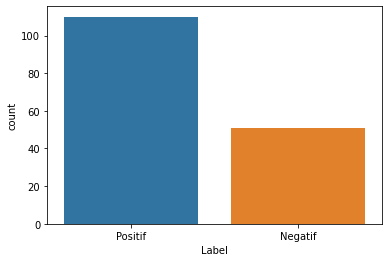

In [25]:
#visualisai jumlah data positif dan negatif
print (f"Sentimen Positif : {len(df_baru[df_baru['Label']== 'Positif'])} data")
print (f"Sentimen Negatif : {len(df_baru[df_baru['Label']== 'Negatif'])} data")
sns.countplot(x='Label',data=df_baru)